`Machine learning` : Structured data

`Deep learning` : Unstructured data

**Workflow**
1. Get data ready (turn into tensors)
2. Build or pick a pretrained model
    - Pick a loss function & optimizer
    - Build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

In [1]:
import torch
print(torch.__version__)

2.5.0+cu121


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Tensors

#### Creating Tensors

In [3]:
# Scalar
scalar = torch.tensor(7)
scalar

tensor(7)

`torch.tensor` is a multi-dimensional matrix containing elements of a single data type.

In [4]:
scalar.ndim

0

In [5]:
scalar.item() # Get tensor back as python int

7

In [6]:
# Vector
vector = torch.tensor([1,3])
vector

tensor([1, 3])

In [7]:
vector.ndim

1

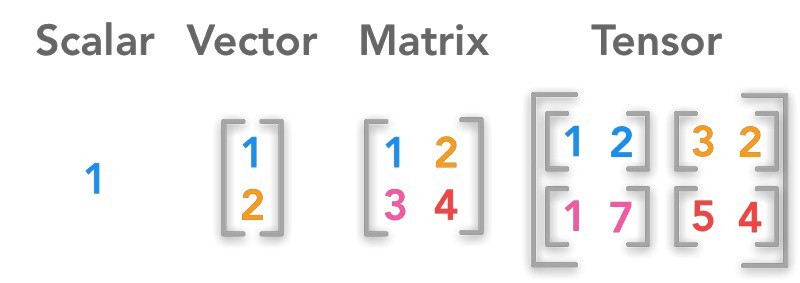

`dimensions` :  no. of square brackets

In [8]:
vector.shape

torch.Size([2])

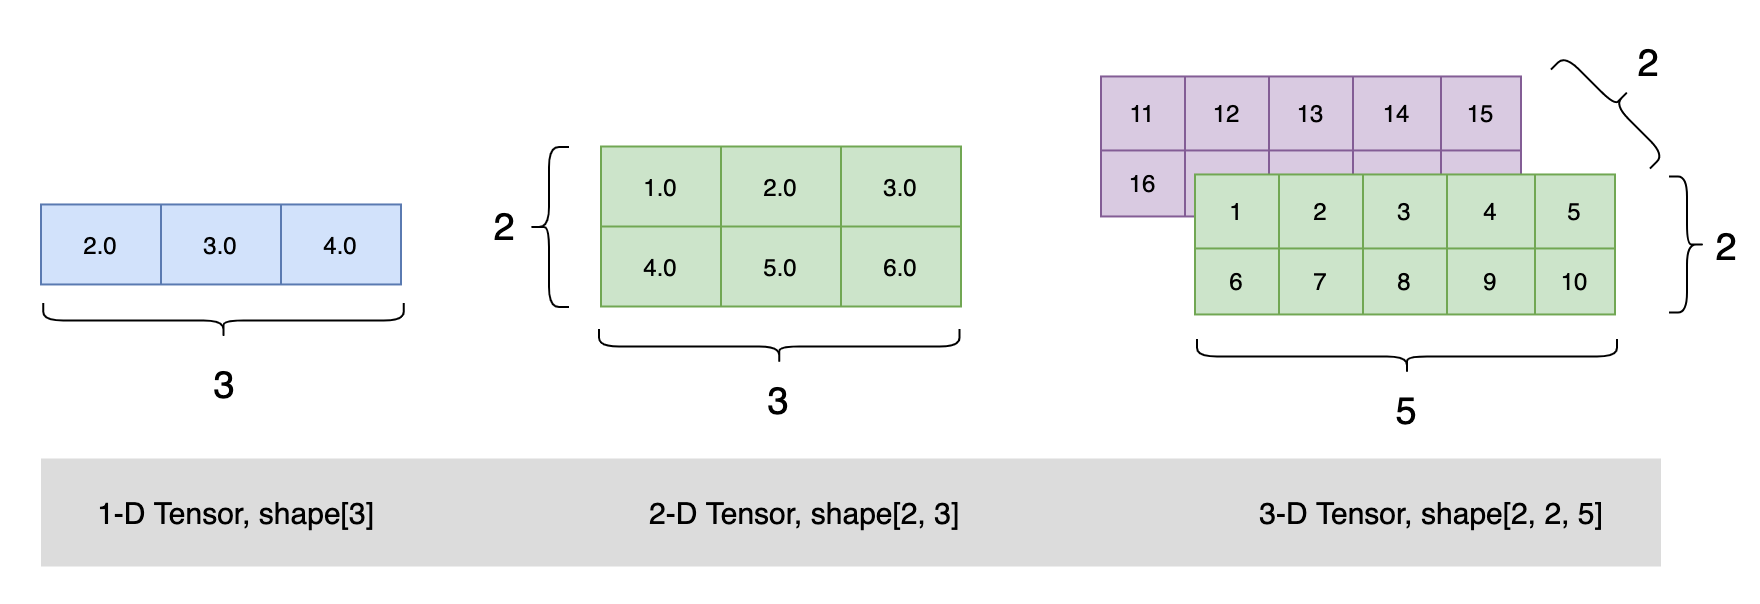

In [9]:
# Matrix
MATRIX = torch.tensor([[7,9],
                       [3,6]])
MATRIX

tensor([[7, 9],
        [3, 6]])

In [10]:
MATRIX.ndim

2

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
MATRIX[0]

tensor([7, 9])

In [13]:
MATRIX[1]

tensor([3, 6])

In [14]:
# Tensor
TENSOR = torch.tensor([[[2,3,4],
                        [5,9,0],
                        [9,7,1]]])
TENSOR

tensor([[[2, 3, 4],
         [5, 9, 0],
         [9, 7, 1]]])

In [15]:
TENSOR.ndim

3

In [16]:
TENSOR.shape

torch.Size([1, 3, 3])

In [17]:
TENSOR[0]

tensor([[2, 3, 4],
        [5, 9, 0],
        [9, 7, 1]])

In [18]:
MY_TENSOR = torch.tensor([
              [[1,2,3],
               [4,5,6]],
              [[7,8,9],
               [10,11,12]]
              ])

In [19]:
MY_TENSOR

tensor([[[ 1,  2,  3],
         [ 4,  5,  6]],

        [[ 7,  8,  9],
         [10, 11, 12]]])

In [20]:
MY_TENSOR.ndim

3

In [21]:
MY_TENSOR.shape  # (first 2 means) two planes of 2x3 (next 2 and 3 meaning) matrix place over each other

torch.Size([2, 2, 3])

In [22]:
MY_TENSOR[1]

tensor([[ 7,  8,  9],
        [10, 11, 12]])

#### Random Tensors

- Why Random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then they adjust those random numbers to better represent the data.

In [23]:
# Create a random tensor of size (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.2683, 0.2585, 0.6343, 0.9549],
        [0.0617, 0.7895, 0.9766, 0.2117],
        [0.7650, 0.1796, 0.5409, 0.9158]])

In [24]:
random_tensor_1 = torch.rand(3,1,3)
random_tensor_1

tensor([[[0.3152, 0.5015, 0.8059]],

        [[0.2818, 0.3706, 0.7011]],

        [[0.4387, 0.4980, 0.1610]]])

In [25]:
random_tensor_1.ndim

3

In [26]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3,224,224)) # color_channels(RGB), height, width

In [27]:
random_image_size_tensor.shape

torch.Size([3, 224, 224])

In [28]:
random_image_size_tensor.ndim

3

In [29]:
torch.rand(3,2)

tensor([[0.9815, 0.5251],
        [0.6847, 0.8528],
        [0.8381, 0.5755]])

In [30]:
torch.rand(size=(3,2))

tensor([[0.3585, 0.7448],
        [0.1421, 0.5044],
        [0.8936, 0.7405]])

#### Zeroes and Ones

In [31]:
# Create a tensor of all zeros
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [32]:
zeros*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [33]:
zeros.shape

torch.Size([3, 4])

In [34]:
random_tensor.shape

torch.Size([3, 4])

In [35]:
ones = torch.ones(3,1)
ones

tensor([[1.],
        [1.],
        [1.]])

In [36]:
ones.dtype

torch.float32

In [37]:
random_tensor_1.dtype

torch.float32

#### Range

In [38]:
# Creating a range of tensors and tensor-like

torch.range(0,10)

<ipython-input-38-2e7b791c1d3a>:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  torch.range(0,10)


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [39]:
torch.arange(0,10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
one_to_ten = torch.arange(1,11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
one_to_ten_1 = torch.arange(1,11,3) # start, end, step
one_to_ten_1

tensor([ 1,  4,  7, 10])

In [42]:
# Creating tensors like
ten_zeros = torch.zeros_like(input = one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
image_ones = torch.ones_like(random_image_size_tensor)
image_ones

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [44]:
image_ones.shape

torch.Size([3, 224, 224])

#### Tensor Datatypes

**NOTE**: Tensor datatypes are one of the 3 big errors you'll run into with PyTorch and Deep Learning:
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [45]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 2.4],
                               dtype=None)
float_32_tensor

tensor([3.0000, 6.0000, 2.4000])

In [46]:
float_32_tensor.dtype

torch.float32

In [47]:
float_16_tensor = torch.tensor([3.0, 6.0, 2.4],
                               dtype=torch.float16)
float_16_tensor

tensor([3.0000, 6.0000, 2.4004], dtype=torch.float16)

In [48]:
float_32_tensor_1 = torch.tensor([3.0, 6.0, 2.0],
                               dtype=None,
                               device = None, # "cuda"/"cpu"
                               requires_grad=False) # whether or not to track gradients with this tensors operations
float_32_tensor_1

tensor([3., 6., 2.])

In [49]:
float_16_tensor = float_32_tensor_1.type(torch.float16)
float_16_tensor

tensor([3., 6., 2.], dtype=torch.float16)

In [50]:
float_16_tensor*float_32_tensor_1

tensor([ 9., 36.,  4.])

In [51]:
(float_16_tensor*float_32_tensor_1).dtype

torch.float32

In [52]:
int_32_tensor = torch.tensor([3,6,9], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 9], dtype=torch.int32)

In [53]:
float_32_tensor_1*int_32_tensor

tensor([ 9., 36., 18.])

In [54]:
(float_32_tensor_1*int_32_tensor).dtype

torch.float32

In [55]:
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.7291, 0.4004, 0.9432, 0.4914],
        [0.5395, 0.6359, 0.7728, 0.2383],
        [0.4435, 0.0092, 0.2002, 0.6480]])

In [56]:
# Let's find out details about some_tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of the tensor: {some_tensor.shape}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.7291, 0.4004, 0.9432, 0.4914],
        [0.5395, 0.6359, 0.7728, 0.2383],
        [0.4435, 0.0092, 0.2002, 0.6480]])
Datatype of tensor: torch.float32
Shape of the tensor: torch.Size([3, 4])
Device tensor is on: cpu


#### Manipulate Tensors

Tensors operations include:
* Addition
* Subtraction
* Multiplication (element-wise and matrix)
* Division

In [57]:
add_tensor = torch.tensor([1,3,5])
add_tensor + 10

tensor([11, 13, 15])

In [58]:
add_tensor * 10

tensor([10, 30, 50])

In [59]:
add_tensor

tensor([1, 3, 5])

In [60]:
add_tensor/10

tensor([0.1000, 0.3000, 0.5000])

In [61]:
add_tensor//10

tensor([0, 0, 0])

In [62]:
add_tensor%3

tensor([1, 0, 2])

In [63]:
add_tensor - 10

tensor([-9, -7, -5])

In [64]:
# Try out pytorch in-built functions

torch.mul(add_tensor, 3)

tensor([ 3,  9, 15])

In [65]:
torch.add(add_tensor, 32)

tensor([33, 35, 37])

In [66]:
# Matrix multiplication
print("Element wise multiplication")
print(add_tensor * add_tensor)

Element wise multiplication
tensor([ 1,  9, 25])


In [67]:
add_tensor

tensor([1, 3, 5])

In [68]:
print("Matrix multiplication")
print(torch.matmul(add_tensor, add_tensor)) # 1*1 + 3*3 + 5*5 = 35

Matrix multiplication
tensor(35)


In [69]:
%%time
value = 0
for i in range(len(add_tensor)):
    value += add_tensor[i]*add_tensor[i]
print(value)

tensor(35)
CPU times: user 3.27 ms, sys: 47 µs, total: 3.31 ms
Wall time: 4.95 ms


In [70]:
%%time
torch.matmul(add_tensor, add_tensor)  # FAST

CPU times: user 1.89 ms, sys: 0 ns, total: 1.89 ms
Wall time: 2.48 ms


tensor(35)

In [71]:
add_tensor @ add_tensor # "@" is also used for matmul(matrix multiplication)

tensor(35)

In [72]:
torch.matmul(torch.rand(3,10), torch.rand(10,3))

tensor([[2.2737, 2.9856, 2.3791],
        [2.5735, 3.3730, 2.2782],
        [2.2381, 3.1821, 1.6150]])

#### One of the most common errors in deep learning: Shape Errors

In [73]:
tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[7,8],
                         [9,10],
                         [11,12]])

torch.mm(tensor_A, tensor_B) # "torch.mm" is shorthand for matrix multiplication (matmul)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

To fix our tensor shape issue, we can manipulate the shape of one of our tensors using a **transpose**

In [74]:
tensor_B.T

tensor([[ 7,  9, 11],
        [ 8, 10, 12]])

In [75]:
tensor_B.T.shape

torch.Size([2, 3])

In [76]:
tensor_B

tensor([[ 7,  8],
        [ 9, 10],
        [11, 12]])

In [77]:
tensor_B.shape

torch.Size([3, 2])

In [78]:
torch.mm(tensor_A, tensor_B.T)

tensor([[ 23,  29,  35],
        [ 53,  67,  81],
        [ 83, 105, 127]])

### Finding min, max, mean, sum etc. (tensor aggregation)

In [79]:
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [80]:
# Find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [81]:
# Find the max
torch.max(x)

tensor(90)

In [82]:
x.max()

tensor(90)

In [83]:
# Find the mean
torch.mean(x)

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [85]:
x.dtype

torch.int64

In [86]:
torch.mean(x.type(torch.float32))

tensor(45.)

In [87]:
x.type(torch.float32).mean()

tensor(45.)

**NOTE** : The torch.mean() function requires a tensor of float32 datatype to work

In [88]:
# Find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

#### argmin, argmax

In [89]:
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [90]:
x.argmin() # Gives the position in tensor that has the minimum value

tensor(0)

In [91]:
x[0]

tensor(0)

In [92]:
x.argmax() # Gives the position in tensor that has the maximum value

tensor(9)

In [93]:
x[9]

tensor(90)

### Reshaping, Viewing and Stacking

- `Reshaping`: Reshapes an input tensor to a defined shape
- `View`: Return a view of an input tensor of certain shape but keep the same memory as the original tensor
- `Stacking`: Combine multiple tensors on top of each other (vstack) or side by side (hstack)
- `Squeeze`: Removes all `1` dimensions from a tensor
- `Unsqueeze`: Add a `1` dimension to a target tensor
- `Permute`: Return a view of the input with dimensions permuted(swapped) in a certain way

In [94]:
import torch
x = torch.arange(1.,13.)
x, x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 torch.Size([12]))

In [95]:
# Reshape
x_reshaped = x.reshape(1,7)
x_reshaped, x_reshaped.shape

RuntimeError: shape '[1, 7]' is invalid for input of size 12

In [ ]:
x_reshaped = x.reshape(6,2)
x_reshaped, x_reshaped.shape

In [ ]:
x_reshaped = x.reshape(4,3)
x_reshaped, x_reshaped.shape

In [ ]:
# Change the view
x = torch.arange(1.,10.)
x, x.shape

In [ ]:
# View = Reshape
z = x.view(1,9)
z, z.shape

In [96]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:,0] = 5
z,x

NameError: name 'z' is not defined

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x])
x_stacked

In [97]:
x_stacked = torch.stack([x, x, x, x],dim=0)
x_stacked

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
        [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]])

In [98]:
x_stacked = torch.stack([x, x, x, x],dim=1)
x_stacked

tensor([[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [ 6.,  6.,  6.,  6.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.],
        [11., 11., 11., 11.],
        [12., 12., 12., 12.]])

In [99]:
x = torch.zeros(2, 1, 2)
x, x.shape, x.ndim

(tensor([[[0., 0.]],
 
         [[0., 0.]]]),
 torch.Size([2, 1, 2]),
 3)

In [100]:
# squeeze
y = torch.squeeze(x)
y, y.shape, y.ndim

(tensor([[0., 0.],
         [0., 0.]]),
 torch.Size([2, 2]),
 2)

In [101]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim
print(f"Previous target: {y}")
print(f"Previous shape: {y.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = y.unsqueeze(dim=0)
print(f"\n New tensor: {x_unsqueezed}")
print(f"New shape is: {x_unsqueezed.shape}")

Previous target: tensor([[0., 0.],
        [0., 0.]])
Previous shape: torch.Size([2, 2])

 New tensor: tensor([[[0., 0.],
         [0., 0.]]])
New shape is: torch.Size([1, 2, 2])


In [105]:
print(f"Previous target: {y}")
print(f"Previous shape: {y.shape}")

# Add an extra dimension with unsqueeze
x_unsqueezed = y.unsqueeze(dim=2)
print(f"\n New tensor: {x_unsqueezed}")
print(f"New shape is: {x_unsqueezed.shape}")

Previous target: tensor([[0., 0.],
        [0., 0.]])
Previous shape: torch.Size([2, 2])

 New tensor: tensor([[[0.],
         [0.]],

        [[0.],
         [0.]]])
New shape is: torch.Size([2, 2, 1])


#### torch.permute
rearranges the dimensions of a target tensor in a specified order (shares the same memory as it is a view)

In [110]:
x_original = torch.rand(3,224,224)

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(1, 2, 0) # shifts axis 1->0, 2->1, 0->2

In [111]:
x_original.shape

torch.Size([3, 224, 224])

In [112]:
x_permuted.shape

torch.Size([224, 224, 3])

In [113]:
x_original [0,0,0]

tensor(0.1360)

In [114]:
x_permuted[0,0,0]

tensor(0.1360)

In [115]:
x_original [0,0,0] = 90

In [116]:
x_permuted[0,0,0]

tensor(90.)

#### Indexing (selecting data from tensors)
Indexing with PyTorch is similar to indexing with Numpy

In [117]:
x = torch.arange(1,10).reshape(1,3,3)
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [118]:
x.shape

torch.Size([1, 3, 3])

In [119]:
# Let's index on our new tensor

x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [121]:
# Let's index on the middle bracket (dim=1)
x[0][0]

tensor([1, 2, 3])

In [124]:
x[0][1][1]

tensor(5)

In [126]:
# You can also use ":" to select "all" of a target dimension

x[:,0] # select all of the 0th dimension and then 0th element from the 1st dimension

tensor([[1, 2, 3]])

In [128]:
# TASK: Print 3,6,9
x[:,:,2]   # 3D plate, Row, Column

tensor([[3, 6, 9]])

In [129]:
x

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [130]:
x[:,1,1]

tensor([5])

In [131]:
x[0][1][1]

tensor(5)

In [132]:
x[0,1,1]

tensor(5)

### PyTorch and Numpy
- Data in Numpy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`

- PyTorch tensor -> Numpy -> `torch.Tensor.numpy()`

In [134]:
import torch
import numpy as np

array = np.arange(1.0,9.0)
tensor_format = torch.from_numpy(array)
array, tensor_format

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7., 8.], dtype=torch.float64))

In [135]:
array.dtype

dtype('float64')

In [136]:
tensor_format.dtype

torch.float64

In [140]:
torch.arange(1.0,5.0).dtype # default datatype of pytorch is float32

torch.float32

In [143]:
tensor_format = torch.from_numpy(array).type(torch.float32)
tensor_format, tensor_format.dtype

(tensor([1., 2., 3., 4., 5., 6., 7., 8.]), torch.float32)

⚠️ WARNING:
When converting from Numpy -> pytorch, PyTorch reflects NumPy's default datatype of float64 unless specified explicitly

In [145]:
array = array+1
tensor_format, array
# New tensor in memory, array doesn't affect it now

(tensor([1., 2., 3., 4., 5., 6., 7., 8.]),
 array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]))

In [147]:
# Tensor to NumPy array
tensor = torch.ones(5)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1.]), array([1., 1., 1., 1., 1.], dtype=float32))

In [149]:
# Default dtype of numpy is float64 and default datatype of pytorch tensor is float32

In [150]:
tensor = tensor+2
tensor, numpy_tensor
# They don't share memory

(tensor([3., 3., 3., 3., 3.]), array([1., 1., 1., 1., 1.], dtype=float32))

### Reproducbility (trying to take random out of random)

In short how a neural network learns:

`Start with random numbers -> tensor operations -> Update random numbers to try and make them better representation of the data -> again -> again -> ....again`

In [152]:
torch.rand(3,3) # Everytime it gives different random numbers

tensor([[0.3753, 0.3883, 0.8444],
        [0.8069, 0.0209, 0.6118],
        [0.3323, 0.0048, 0.9255]])

To reduce the randomness in Neural Network and in PyTorch comes the concept of a **random seed**

In [154]:
# Create two random tensors
random_tensor_A = torch.rand(4,3)
random_tensor_B = torch.rand(4,3)
print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.0798, 0.7770, 0.8760],
        [0.2840, 0.2300, 0.2844],
        [0.3666, 0.9545, 0.6130],
        [0.0353, 0.0485, 0.3198]])
tensor([[0.9564, 0.9891, 0.1719],
        [0.5193, 0.6382, 0.6692],
        [0.0072, 0.1298, 0.3353],
        [0.8246, 0.2813, 0.1915]])
tensor([[False, False, False],
        [False, False, False],
        [False, False, False],
        [False, False, False]])


In [159]:
# Let's make some random but reproducible tensors
torch.manual_seed(42)

random_tensor_C = torch.rand(3,4)
random_tensor_C

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

In [158]:
# !! INTERESTING

torch.manual_seed(42)
random_tensor_C = torch.rand(3,4)

torch.manual_seed(42)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


In [165]:
# !! The number creates different-different flavours

torch.manual_seed(42)
random_tensor_E = torch.rand(3,4)

torch.manual_seed(45)
random_tensor_F = torch.rand(3,4)

print(random_tensor_E)
print(random_tensor_F)
print(random_tensor_E == random_tensor_F)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.1869, 0.9613, 0.6834, 0.8988],
        [0.0505, 0.5555, 0.7861, 0.0566],
        [0.7842, 0.1480, 0.0388, 0.1037]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


### Running tensors and PyTorch objects on the GPUs (and making faster computations)

GPUs = Faster computation on the numbers


---

1. Easiest: Use Google Colab for a free GPU
2. Use your own GPU
3. Use cloud computing: GCP, AWS, Azure


---
For 2 and 3 PyTorch + GPU Drivers (CUDA) takes a little bit of setting up, refer to PyTorch setup documentation :

https://pytorch.org/get-started/locally/

#### Check for GPU access with PyTorch

In [11]:
!nvidia-smi

Fri Nov  8 06:35:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0              29W /  70W |    105MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [1]:
import torch
torch.cuda.is_available()

True

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Count number of devices
torch.cuda.device_count()

1

In [4]:
# Putting tensors(and models) on the GPU

# Create a default tensor
tensor = torch.tensor([1,2,3])

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [5]:
# Move tensor to GPU(if available)
tensor_on_GPU = tensor.to(device)
tensor_on_GPU

tensor([1, 2, 3], device='cuda:0')

#### Moving tensors back to the GPU

In [6]:
# If tensors are on GPU, can't transform it to NumPy
tensor_on_GPU.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [8]:
tensor_back_on_cpu = tensor_on_GPU.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])